In [1]:
using Plots

include("src/PolyColloid.jl")
using .PolyColloid

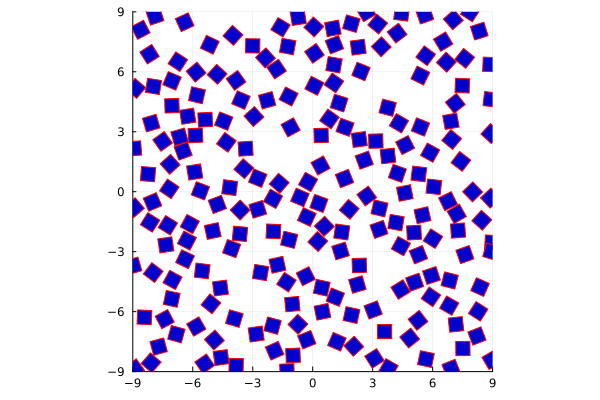

In [7]:
n = 200
sim = PolyColloid.Simulation(n, 4, 0.5, (18, 18))
crystallize!(sim.colloid)
sim.move_radius = 0.25
sim.rotation_span = π / 8
run!(sim, 10n)
plot(sim.colloid, ratio=:equal, legend=false)